In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
housing=pd.read_csv('california_housing.csv')

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Here we can see bedrooms data is missing so we'll deal with it later

In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

It is clear that ocean_proximity is not ordinal variable so we'll perform one hot encoding

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f398f0cb590>,
      dtype=object)

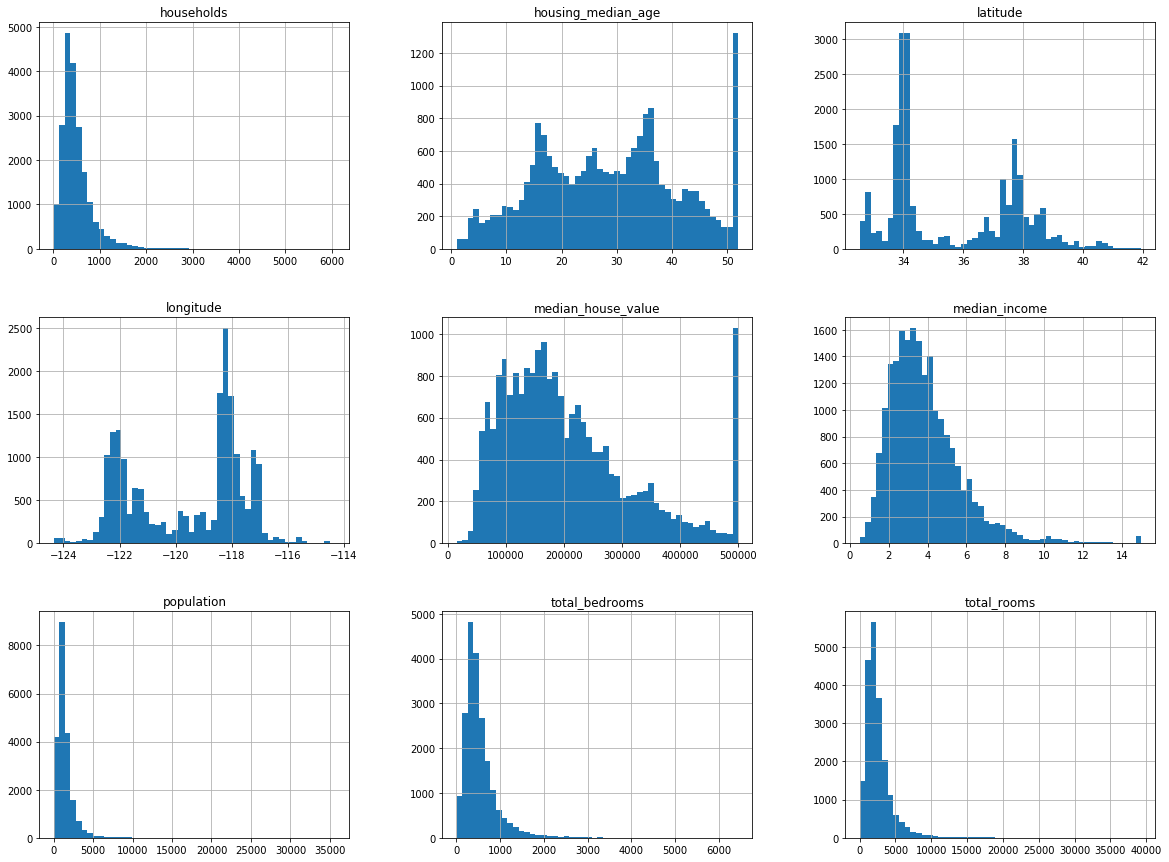

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(figsize=(20,15),bins=50)

Here we can see the distribution of the columns and most of them are skewed

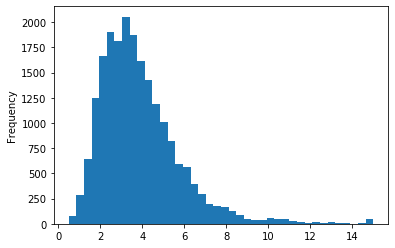

In [7]:
housing['median_income'].plot(kind='hist',bins=40)

Median income is one of the most import contributor to the median house value so we need to split the data 
according to median_income.Since, it is continuous variable we need to divide it in bins without affecting the 
distribution for stratified sampling

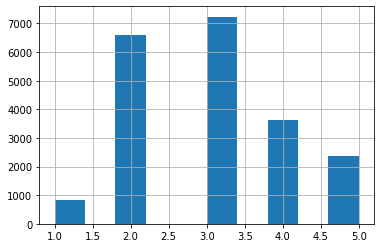

In [8]:
housing['income_cat']=pd.cut(housing['median_income'],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])
housing['income_cat'].hist()

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42,stratify=housing['income_cat'])

In [10]:
train_set['income_cat'].value_counts()/len(train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [11]:
for set in (train_set,test_set):
    set.drop('income_cat',axis=1,inplace=True)

/home/aakashkhadka/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [13]:
housing=train_set.copy()

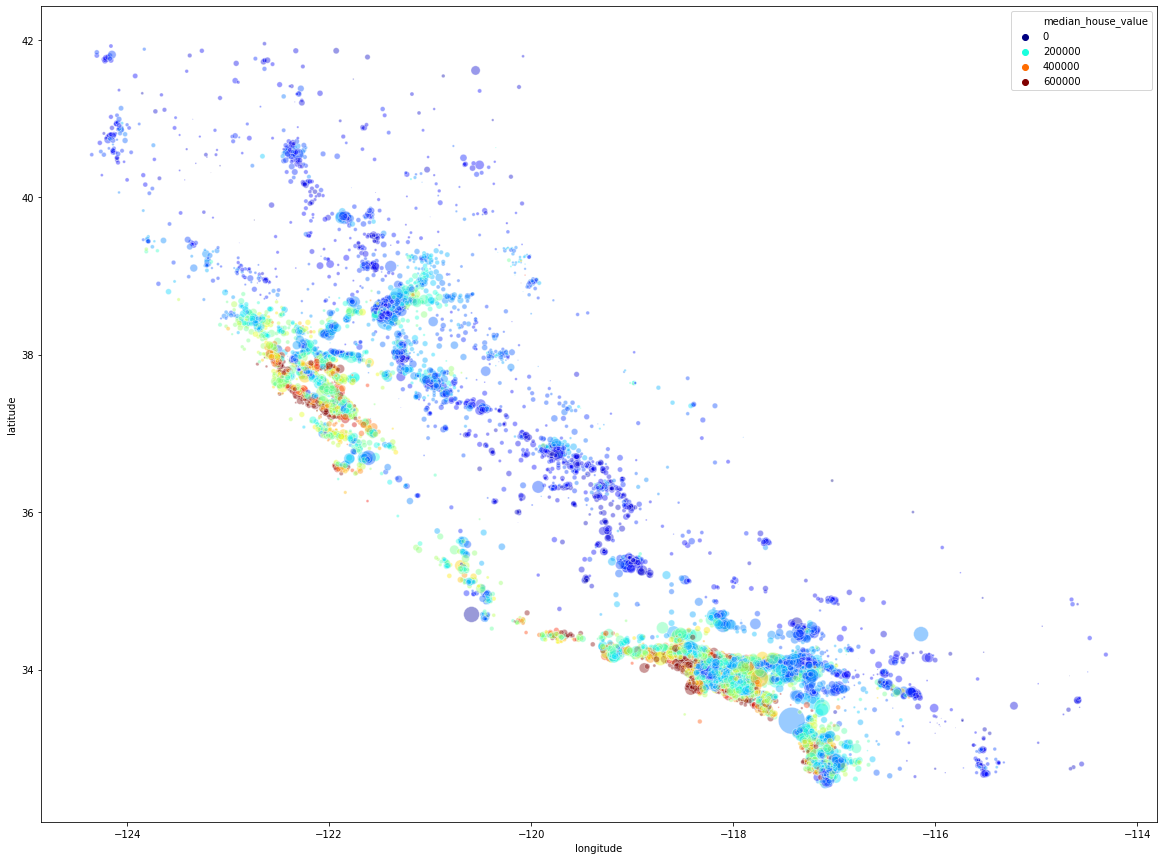

In [14]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=housing,x='longitude',y='latitude',alpha=0.4,hue='median_house_value',palette='jet',s=housing['population']/50)

In [15]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

### Experimenting the new features

In [16]:
housing['rooms_per_house']=housing['total_rooms']/housing['households']
housing['bedroom_per_rooms']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [17]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_house             0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedroom_per_rooms          -0.259984
Name: median_house_value, dtype: float64

In [18]:
housing=train_set.drop('median_house_value',axis=1)
housing_label=train_set['median_house_value'].copy()

In [19]:
room_ix,bedroom_ix,population_ix,house_ix=3,4,5,6

from sklearn.base import BaseEstimator,TransformerMixin
class CustomTransformer(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedroom_per_room=True):
        self.add_bedroom_per_room=add_bedroom_per_room
        
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        room_per_household=X[:,room_ix]/X[:,house_ix]
        room_per_population=X[:,room_ix]/X[:,population_ix]
        if self.add_bedroom_per_room:
            bedroom_per_room=X[:,bedroom_ix]/X[:,room_ix]
            return np.c_[X,room_per_household,room_per_population,bedroom_per_room]
        else:
            return np.c_[X,room_per_household,room_per_population]
        
    

In [20]:
housing_num=housing.select_dtypes(exclude='O')
housing_cat=housing.select_dtypes(include='O')

In [21]:
num_cols=housing_num.columns.tolist()
cat_cols=housing_cat.columns.tolist()
num_cols,cat_cols

(['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income'],
 ['ocean_proximity'])

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
pipe1=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('custom',CustomTransformer()),
    ('scale',StandardScaler())
])

In [23]:
pipe1.fit_transform(housing_num)

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
         0.18575356,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
         0.19440151, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
         0.08449912,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
         0.27274564, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
        -0.44247118, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
         0.37551419,  0.10180567]])

In [24]:
pipe2=Pipeline(steps=[
    ('onehot',OneHotEncoder())
])

In [25]:
pipe2.fit_transform(housing_cat)

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [26]:
from sklearn.compose import ColumnTransformer
full_pipeline=ColumnTransformer([
    ('num_transformer',pipe1,num_cols),
    ('cat_transformer',pipe2,cat_cols)
])

In [27]:
housing_prepared=full_pipeline.fit_transform(housing)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
linreg=LinearRegression()
linreg.fit(housing_prepared,housing_label)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
pred=linreg.predict(housing_prepared)
print("RMSE:",np.sqrt(MSE(housing_label,pred)))

RMSE: 67325.81195596432


It's underfitting the data so we could use more complex model or regularize the unwanted parameters

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(housing_prepared,housing_label)
pred=dtree.predict(housing_prepared)
print("RMSE:",np.sqrt(MSE(housing_label,pred)))

RMSE: 0.0


In [31]:
def display_scores(scores):
    print("RMSE score",scores.mean())
    print("RMSE standard deviation",scores.std())

It seems decison tree badly overfits the data

In [32]:
from sklearn.model_selection import cross_val_score
score=-cross_val_score(dtree,housing_prepared,housing_label,cv=10,scoring='neg_mean_squared_error')
rmse=np.sqrt(score)
display_scores(rmse)

RMSE score 69505.73774675664
RMSE standard deviation 2025.030582792922


Actually the decision tree performs badly than linear regression

In [33]:
score=-cross_val_score(linreg,housing_prepared,housing_label,cv=10,scoring='neg_mean_squared_error')
rmse=np.sqrt(score)
display_scores(rmse)

RMSE score 68076.31260872976
RMSE standard deviation 2229.947694644955


In [35]:
from sklearn.ensemble import RandomForestRegressor
rclf=RandomForestRegressor()
rclf.fit(housing_prepared,housing_label)
score=-cross_val_score(rclf,housing_prepared,housing_label,cv=10,scoring='neg_mean_squared_error')
rmse=np.sqrt(score)
display(score)

array([2.41373552e+09, 2.17714202e+09, 2.36229556e+09, 2.55258465e+09,
       2.34693265e+09, 2.72136763e+09, 2.21939288e+09, 2.29734943e+09,
       2.63916503e+09, 2.36959501e+09])

In [37]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [42]:
feature_importance=grid_search.best_estimator_.feature_importances_
feature_importance

array([7.72653299e-02, 7.81675822e-02, 3.91609793e-02, 1.80788233e-02,
       1.74774232e-02, 1.85229719e-02, 1.70360735e-02, 3.04535148e-01,
       4.23493994e-02, 1.35263816e-01, 7.57916849e-02, 1.29758701e-02,
       1.56911719e-01, 2.57865839e-05, 2.62586536e-03, 3.81152817e-03])

In [71]:
added_cols=['room_per_household','room_per_population','bedroom_per_room']
cat_transformer=full_pipeline.named_transformers_['cat_transformer']
cat_cols=cat_transformer[0].get_feature_names()
cols=num_cols+added_cols+cat_cols.tolist()
lst=list(zip(cols,feature_importance))
sorted(lst,key=lambda x:x[1],reverse=True)

[('median_income', 0.3045351476838959),
 ('x0_INLAND', 0.1569117186221822),
 ('room_per_population', 0.13526381602279625),
 ('latitude', 0.07816758220493482),
 ('longitude', 0.0772653298503151),
 ('bedroom_per_room', 0.07579168493550892),
 ('room_per_household', 0.042349399386832194),
 ('housing_median_age', 0.039160979265204156),
 ('population', 0.018522971924690282),
 ('total_rooms', 0.018078823268885023),
 ('total_bedrooms', 0.017477423169109888),
 ('households', 0.017036073452623514),
 ('x0_<1H OCEAN', 0.012975870096798825),
 ('x0_NEAR OCEAN', 0.003811528171596174),
 ('x0_NEAR BAY', 0.002625865360702261),
 ('x0_ISLAND', 2.5786583924439556e-05)]

In [85]:
def indices_of_topk(featureimp,k):
    return np.argsort(featureimp)[::-1][:k]
indices_of_topk(feature_importance,5)
class Top_feature_selector(BaseEstimator,TransformerMixin):
    def __init__(self,feature_imp,k):
        self.feature_imp=feature_imp
        self.k=k
    def fit(self,X,y=None):
        self.feature_indices=indices_of_topk(self.feature_imp,self.k)
        return self
    
    def transform(self,X,y=None):
        return X[:,self.feature_indices]
        

In [88]:
tf=Top_feature_selector(feature_importance,5)
tf.fit_transform(housing_prepared,housing_label).shape


(16512, 5)

In [91]:
full_pipeline_with_feature_selection=Pipeline(steps=[
    ('preprocess',full_pipeline),
    ('feature_selection',Top_feature_selector(feature_importance,5))
])
full_pipeline_with_feature_selection.fit_transform(housing)

array([[-0.61493744,  0.        ,  0.18575356,  0.77194962, -1.15604281],
       [ 1.33645936,  0.        ,  0.19440151,  0.6596948 , -1.17602483],
       [-0.5320456 ,  0.        ,  0.08449912, -1.34218285,  1.18684903],
       ...,
       [-0.3167053 ,  1.        ,  0.27274564, -0.72478134,  1.58648943],
       [ 0.09812139,  0.        , -0.44247118, -0.85106801,  0.78221312],
       [-0.15779865,  0.        ,  0.37551419,  0.99645926, -1.43579109]])

In [96]:
pipeline_with_predict=Pipeline(steps=[
    ('preprocess_and_feature',full_pipeline_with_feature_selection),
    ('model',RandomForestRegressor())
])
pipeline_with_predict.fit(housing,housing_label)

Pipeline(memory=None,
         steps=[('preprocess_and_feature',
                 Pipeline(memory=None,
                          steps=[('preprocess',
                                  ColumnTransformer(n_jobs=None,
                                                    remainder='drop',
                                                    sparse_threshold=0.3,
                                                    transformer_weights=None,
                                                    transformers=[('num_transformer',
                                                                   Pipeline(memory=None,
                                                                            steps=[('impute',
                                                                                    SimpleImputer(add_indicator=False,
                                                                                                  copy=True,
                                                                

In [101]:
some_data=housing[:5]
some_label=housing_label[:5]
print(pipeline_with_predict.predict(some_data))
some_label.values

[262736.   338646.   199526.    49204.   245030.01]


array([286600., 340600., 196900.,  46300., 254500.])

Here we can see our model is performing quite well